In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import pickle
from util import xgb_helper
from sklearn.model_selection import train_test_split


# Load data

In [24]:
# data_transformed = pd.read_csv('data/data_transformed.csv', index_col=0)
data_transformed = pd.read_csv('data/loan_sample_processed_10pct.csv', index_col=0)
data_transformed.head()

,avg_cur_bal,num_tl_op_past_12m,bc_open_to_buy,tot_hi_cred_lim,total_rec_int,mort_acc,funded_amnt_inv,funded_amnt,loan_amnt,total_bc_limit,...,num_actv_rev_tl,num_rev_tl_bal_gt_0,percent_bc_gt_75,bc_util,annual_inc,total_rev_hi_lim,verification_status,home_ownership,purpose,loan_status_code
0,36431.0,2.0,4917.0,445842.0,1163.01,1.0,6400.0,6400.0,6400.0,14000.0,...,5.0,6.0,66.7,64.9,65000.0,27900.0,1,1,1,0
1,4326.0,1.0,5299.0,34156.0,3492.65,0.0,14200.0,14200.0,14200.0,13000.0,...,3.0,3.0,50.0,59.2,60000.0,18700.0,2,5,13,0
2,21254.0,3.0,7940.0,326070.0,819.48,1.0,10000.0,10000.0,10000.0,9000.0,...,2.0,2.0,0.0,11.8,60000.0,35400.0,1,1,4,0
3,11980.0,3.0,4003.0,125737.0,723.98,2.0,7025.0,7025.0,7025.0,9800.0,...,3.0,3.0,0.0,59.2,35000.0,15500.0,0,1,2,0
4,2990.0,1.0,29650.0,44600.0,225.04,2.0,12000.0,12000.0,12000.0,44600.0,...,5.0,5.0,20.0,33.5,96000.0,44600.0,2,1,2,0


In [25]:
data_transformed.describe()

,avg_cur_bal,num_tl_op_past_12m,bc_open_to_buy,tot_hi_cred_lim,total_rec_int,mort_acc,funded_amnt_inv,funded_amnt,loan_amnt,total_bc_limit,...,num_actv_rev_tl,num_rev_tl_bal_gt_0,percent_bc_gt_75,bc_util,annual_inc,total_rev_hi_lim,verification_status,home_ownership,purpose,loan_status_code
count,129769.000000,129769.000000,129769.000000,1.297690e+05,129769.000000,129769.000000,129769.000000,129769.000000,129769.000000,129769.000000,...,129769.000000,129769.000000,129769.000000,129769.000000,1.297690e+05,1.297690e+05,129769.000000,129769.000000,129769.000000,129769.000000
mean,13164.108292,2.071250,9571.492213,1.710551e+05,2402.410812,1.610685,14413.900723,14442.828410,14450.735345,21258.192218,...,5.358152,5.311176,45.212315,60.257656,7.633730e+04,3.227350e+04,1.014087,2.911682,2.700267,0.218743
std,15957.214893,1.860012,14883.881361,1.737850e+05,2589.726665,1.992253,8719.080369,8712.682913,8715.868405,20890.314225,...,3.459165,3.382607,35.079900,27.532394,7.241442e+04,3.295856e+04,0.783949,1.915431,2.390119,0.413395
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,500.000000,500.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,3259.000000,1.000000,1112.000000,5.209300e+04,765.410000,0.000000,7900.000000,8000.000000,8000.000000,8000.000000,...,3.000000,3.000000,14.300000,40.000000,4.560000e+04,1.460000e+04,0.000000,1.000000,2.000000,0.000000
50%,7423.000000,2.000000,4197.000000,1.126080e+05,1570.550000,1.000000,12000.000000,12000.000000,12000.000000,15000.000000,...,5.000000,5.000000,42.900000,63.400000,6.500000e+04,2.400000e+04,1.000000,4.000000,2.000000,0.000000
75%,17827.000000,3.000000,11645.000000,2.422520e+05,3055.650000,3.000000,20000.000000,20000.000000,20000.000000,27300.000000,...,7.000000,7.000000,75.000000,83.900000,9.000000e+04,3.930000e+04,2.000000,5.000000,2.000000,0.000000
max,447433.000000,24.000000,283705.000000,9.999999e+06,26611.430000,28.000000,40000.000000,40000.000000,40000.000000,363900.000000,...,57.000000,44.000000,100.000000,178.300000,9.500000e+06,1.998700e+06,2.000000,5.000000,13.000000,1.000000


# Check features

In [26]:
features = list(set(data_transformed.columns) - set(['loan_status_code']))
print(features)
print(len(features))

['num_rev_tl_bal_gt_0', 'loan_amnt', 'tot_cur_bal', 'total_rec_int', 'mort_acc', 'funded_amnt_inv', 'num_tl_op_past_12m', 'avg_cur_bal', 'installment', 'total_rev_hi_lim', 'tot_hi_cred_lim', 'total_bc_limit', 'purpose', 'annual_inc', 'funded_amnt', 'verification_status', 'home_ownership', 'percent_bc_gt_75', 'bc_util', 'num_actv_rev_tl', 'bc_open_to_buy']
21


# Remove future features

In [28]:
# features.remove('fico_range_low')
# features.remove('fico_range_high')
# features.remove('debt_settlement_flag')

In [29]:
print(features)

['num_rev_tl_bal_gt_0', 'loan_amnt', 'tot_cur_bal', 'total_rec_int', 'mort_acc', 'funded_amnt_inv', 'num_tl_op_past_12m', 'avg_cur_bal', 'installment', 'total_rev_hi_lim', 'tot_hi_cred_lim', 'total_bc_limit', 'purpose', 'annual_inc', 'funded_amnt', 'verification_status', 'home_ownership', 'percent_bc_gt_75', 'bc_util', 'num_actv_rev_tl', 'bc_open_to_buy']


# Convert to vectors

In [30]:
xs = []
ys = []
for idx, row in data_transformed.iterrows():
    x = [row[f] for f in features]
    xs.append(x)
    ys.append(row['loan_status_code'])
    
xs = np.array(xs)
ys = np.array(ys)

In [31]:
xs

array([[6.00000e+00, 6.40000e+03, 4.00738e+05, ..., 6.49000e+01,
        5.00000e+00, 4.91700e+03],
       [3.00000e+00, 1.42000e+04, 2.16280e+04, ..., 5.92000e+01,
        3.00000e+00, 5.29900e+03],
       [2.00000e+00, 1.00000e+04, 2.76305e+05, ..., 1.18000e+01,
        2.00000e+00, 7.94000e+03],
       ...,
       [4.00000e+00, 1.98000e+04, 1.80490e+04, ..., 5.55000e+01,
        4.00000e+00, 4.75900e+03],
       [0.00000e+00, 6.00000e+03, 8.03860e+04, ..., 8.23000e+01,
        0.00000e+00, 2.12400e+03],
       [3.00000e+00, 1.10000e+04, 3.66955e+05, ..., 9.68000e+01,
        3.00000e+00, 1.89000e+02]])

In [32]:
ys

array([0., 0., 0., ..., 1., 1., 1.])

# Split train, test, eval data and save to pickle file

In [33]:
xtrain, xeval, ytrain, yeval = train_test_split(xs, ys, test_size=0.2, stratify=ys, random_state=100)
xtrain, xtest, ytrain, ytest = train_test_split(xtrain, ytrain, test_size=0.2, stratify=ytrain, random_state=100)

In [34]:
data = dict()

data['features'] = features

data['xtrain'] = xtrain
data['ytrain'] = ytrain

data['xtest'] = xtest
data['ytest'] = ytest

data['xeval'] = xeval
data['yeval'] = yeval

with open('data/LC_model_input.pckl', 'wb') as f:
    pickle.dump(data, f)
    f.close()

# Train the first model

 ## Load data

In [35]:
f = open('data/LC_model_input.pckl', 'rb')
data = pickle.load(f)
f.close()

xtrain = data['xtrain']
ytrain = data['ytrain']
xtest = data['xtest']
ytest = data['ytest']
xeval = data['xeval']
yeval = data['yeval']


In [36]:
features = data['features']
print(features)

['num_rev_tl_bal_gt_0', 'loan_amnt', 'tot_cur_bal', 'total_rec_int', 'mort_acc', 'funded_amnt_inv', 'num_tl_op_past_12m', 'avg_cur_bal', 'installment', 'total_rev_hi_lim', 'tot_hi_cred_lim', 'total_bc_limit', 'purpose', 'annual_inc', 'funded_amnt', 'verification_status', 'home_ownership', 'percent_bc_gt_75', 'bc_util', 'num_actv_rev_tl', 'bc_open_to_buy']


## Train the model with manually chosen hyperparameters

In [37]:
type(ytrain)

numpy.ndarray

In [38]:
model = xgb_helper.XGBModel()
model.fit(xtrain, ytrain, xtest, ytest, features)

[0]	train-auc:0.617795	train-logloss:0.681828	train-map:0.32041	test-auc:0.610404	test-logloss:0.681946	test-map:0.301789
Multiple eval metrics have been passed: 'test-map' will be used for early stopping.

Will train until test-map hasn't improved in 50 rounds.
[1]	train-auc:0.631695	train-logloss:0.671234	train-map:0.338685	test-auc:0.622953	test-logloss:0.671426	test-map:0.316321
[2]	train-auc:0.643364	train-logloss:0.661295	train-map:0.346946	test-auc:0.632129	test-logloss:0.661645	test-map:0.321441
[3]	train-auc:0.653315	train-logloss:0.651923	train-map:0.355674	test-auc:0.640897	test-logloss:0.652436	test-map:0.327556
[4]	train-auc:0.656905	train-logloss:0.643251	train-map:0.356777	test-auc:0.643252	test-logloss:0.643851	test-map:0.32909
[5]	train-auc:0.661937	train-logloss:0.634871	train-map:0.36374	test-auc:0.646588	test-logloss:0.635606	test-map:0.333375
[6]	train-auc:0.665357	train-logloss:0.626958	train-map:0.367645	test-auc:0.647521	test-logloss:0.627965	test-map:0.333793
[

[66]	train-auc:0.721059	train-logloss:0.486316	train-map:0.440061	test-auc:0.689618	test-logloss:0.49546	test-map:0.384794
[67]	train-auc:0.721154	train-logloss:0.485935	train-map:0.440106	test-auc:0.689633	test-logloss:0.495143	test-map:0.384869
[68]	train-auc:0.721658	train-logloss:0.485392	train-map:0.44069	test-auc:0.689873	test-logloss:0.494741	test-map:0.385098
[69]	train-auc:0.722079	train-logloss:0.484865	train-map:0.44123	test-auc:0.690159	test-logloss:0.494327	test-map:0.38555
[70]	train-auc:0.723242	train-logloss:0.484116	train-map:0.442501	test-auc:0.691251	test-logloss:0.493721	test-map:0.386425
[71]	train-auc:0.723697	train-logloss:0.483622	train-map:0.443235	test-auc:0.691546	test-logloss:0.493368	test-map:0.386699
[72]	train-auc:0.723669	train-logloss:0.483278	train-map:0.443144	test-auc:0.691501	test-logloss:0.493088	test-map:0.386775
[73]	train-auc:0.724183	train-logloss:0.482827	train-map:0.443559	test-auc:0.691844	test-logloss:0.492734	test-map:0.387147
[74]	train-a

[133]	train-auc:0.745756	train-logloss:0.464948	train-map:0.471185	test-auc:0.704214	test-logloss:0.481497	test-map:0.400715
[134]	train-auc:0.745869	train-logloss:0.464803	train-map:0.471302	test-auc:0.704244	test-logloss:0.481413	test-map:0.400919
[135]	train-auc:0.74645	train-logloss:0.464483	train-map:0.471787	test-auc:0.704628	test-logloss:0.481223	test-map:0.40121
[136]	train-auc:0.746612	train-logloss:0.464348	train-map:0.472072	test-auc:0.704725	test-logloss:0.481155	test-map:0.401302
[137]	train-auc:0.746687	train-logloss:0.464252	train-map:0.472236	test-auc:0.704664	test-logloss:0.481133	test-map:0.401313
[138]	train-auc:0.746746	train-logloss:0.464141	train-map:0.472346	test-auc:0.704654	test-logloss:0.481074	test-map:0.401395
[139]	train-auc:0.74688	train-logloss:0.464026	train-map:0.472575	test-auc:0.704664	test-logloss:0.481036	test-map:0.40142
[140]	train-auc:0.747032	train-logloss:0.463887	train-map:0.472786	test-auc:0.704748	test-logloss:0.480949	test-map:0.401582
[141

[199]	train-auc:0.757048	train-logloss:0.456451	train-map:0.486496	test-auc:0.708918	test-logloss:0.47781	test-map:0.406241
[200]	train-auc:0.757348	train-logloss:0.45628	train-map:0.486864	test-auc:0.708966	test-logloss:0.477768	test-map:0.406353
[201]	train-auc:0.757415	train-logloss:0.456207	train-map:0.486942	test-auc:0.709028	test-logloss:0.477725	test-map:0.40642
[202]	train-auc:0.757586	train-logloss:0.456094	train-map:0.48719	test-auc:0.709152	test-logloss:0.47767	test-map:0.406483
[203]	train-auc:0.757927	train-logloss:0.455883	train-map:0.487632	test-auc:0.709481	test-logloss:0.477518	test-map:0.40684
[204]	train-auc:0.757957	train-logloss:0.455814	train-map:0.487705	test-auc:0.709454	test-logloss:0.4775	test-map:0.406909
[205]	train-auc:0.75809	train-logloss:0.455705	train-map:0.487878	test-auc:0.709521	test-logloss:0.477454	test-map:0.406969
[206]	train-auc:0.758238	train-logloss:0.455607	train-map:0.488057	test-auc:0.709575	test-logloss:0.477412	test-map:0.407066
[207]	tra

[265]	train-auc:0.767037	train-logloss:0.449916	train-map:0.50025	test-auc:0.713214	test-logloss:0.475243	test-map:0.41172
[266]	train-auc:0.767031	train-logloss:0.449897	train-map:0.500257	test-auc:0.713223	test-logloss:0.475235	test-map:0.411706
[267]	train-auc:0.767147	train-logloss:0.449842	train-map:0.500432	test-auc:0.713274	test-logloss:0.475222	test-map:0.411777
[268]	train-auc:0.767334	train-logloss:0.449706	train-map:0.500672	test-auc:0.713415	test-logloss:0.47515	test-map:0.411903
[269]	train-auc:0.767676	train-logloss:0.449492	train-map:0.501123	test-auc:0.713716	test-logloss:0.475012	test-map:0.412266
[270]	train-auc:0.767718	train-logloss:0.449455	train-map:0.501195	test-auc:0.713685	test-logloss:0.475019	test-map:0.412277
[271]	train-auc:0.767812	train-logloss:0.449388	train-map:0.501335	test-auc:0.713728	test-logloss:0.474998	test-map:0.412323
[272]	train-auc:0.767958	train-logloss:0.449307	train-map:0.501563	test-auc:0.713777	test-logloss:0.474978	test-map:0.412326
[27

[331]	train-auc:0.773415	train-logloss:0.445776	train-map:0.509716	test-auc:0.715032	test-logloss:0.474069	test-map:0.414508
[332]	train-auc:0.77352	train-logloss:0.445717	train-map:0.50986	test-auc:0.715078	test-logloss:0.474047	test-map:0.414586
[333]	train-auc:0.77363	train-logloss:0.445648	train-map:0.510056	test-auc:0.715001	test-logloss:0.474072	test-map:0.41454
[334]	train-auc:0.773747	train-logloss:0.445586	train-map:0.510238	test-auc:0.715095	test-logloss:0.474034	test-map:0.414651
[335]	train-auc:0.7738	train-logloss:0.445546	train-map:0.510305	test-auc:0.715107	test-logloss:0.474018	test-map:0.414703
[336]	train-auc:0.773844	train-logloss:0.445515	train-map:0.510365	test-auc:0.715084	test-logloss:0.474024	test-map:0.414672
[337]	train-auc:0.773962	train-logloss:0.445467	train-map:0.510557	test-auc:0.715075	test-logloss:0.474027	test-map:0.414697
[338]	train-auc:0.774088	train-logloss:0.445403	train-map:0.510719	test-auc:0.71515	test-logloss:0.473994	test-map:0.414763
[339]	t

[397]	train-auc:0.778722	train-logloss:0.442425	train-map:0.51752	test-auc:0.716329	test-logloss:0.473302	test-map:0.416587
[398]	train-auc:0.778763	train-logloss:0.442405	train-map:0.517574	test-auc:0.716323	test-logloss:0.473304	test-map:0.416598
[399]	train-auc:0.778795	train-logloss:0.442373	train-map:0.517637	test-auc:0.716334	test-logloss:0.47329	test-map:0.41659
[400]	train-auc:0.778802	train-logloss:0.442365	train-map:0.517641	test-auc:0.716319	test-logloss:0.473294	test-map:0.416584
[401]	train-auc:0.778819	train-logloss:0.442332	train-map:0.517695	test-auc:0.716294	test-logloss:0.473299	test-map:0.416633
[402]	train-auc:0.778894	train-logloss:0.442269	train-map:0.517794	test-auc:0.716289	test-logloss:0.473304	test-map:0.416591
[403]	train-auc:0.779002	train-logloss:0.442187	train-map:0.517953	test-auc:0.716362	test-logloss:0.473277	test-map:0.416556
[404]	train-auc:0.779169	train-logloss:0.44209	train-map:0.518158	test-auc:0.71648	test-logloss:0.473228	test-map:0.416691
[405]

[463]	train-auc:0.782684	train-logloss:0.439773	train-map:0.523462	test-auc:0.717016	test-logloss:0.472838	test-map:0.417717
[464]	train-auc:0.782731	train-logloss:0.439741	train-map:0.523522	test-auc:0.717002	test-logloss:0.472848	test-map:0.417672
[465]	train-auc:0.782797	train-logloss:0.439696	train-map:0.523611	test-auc:0.717047	test-logloss:0.472828	test-map:0.417721
[466]	train-auc:0.782919	train-logloss:0.439642	train-map:0.523803	test-auc:0.717063	test-logloss:0.472824	test-map:0.417672
[467]	train-auc:0.782995	train-logloss:0.439606	train-map:0.523902	test-auc:0.717049	test-logloss:0.472833	test-map:0.417631
[468]	train-auc:0.783066	train-logloss:0.439558	train-map:0.524076	test-auc:0.717017	test-logloss:0.472841	test-map:0.41765
[469]	train-auc:0.783177	train-logloss:0.439511	train-map:0.524233	test-auc:0.717001	test-logloss:0.472847	test-map:0.417601
[470]	train-auc:0.783197	train-logloss:0.4395	train-map:0.524264	test-auc:0.716985	test-logloss:0.472851	test-map:0.417614
[47

# View the feature weights

In [39]:
feature_weights = model.get_feature_weights(features)

In [40]:
fname = [x[0] for x in feature_weights]
fweight = [x[1] for x in feature_weights]

Text(0, 0.5, 'feature weights')

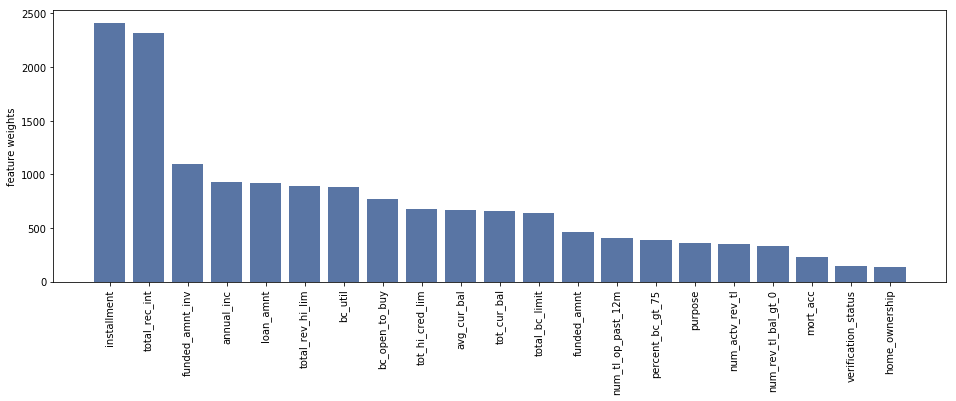

In [41]:
plt.figure(figsize=(16, 5))
plt.bar(fname, fweight, color='#5975A4')
plt.xticks(rotation=90)
plt.ylabel('feature weights')

In [42]:
feature_weights

[('installment', 2413),
 ('total_rec_int', 2318),
 ('funded_amnt_inv', 1096),
 ('annual_inc', 924),
 ('loan_amnt', 921),
 ('total_rev_hi_lim', 893),
 ('bc_util', 885),
 ('bc_open_to_buy', 766),
 ('tot_hi_cred_lim', 679),
 ('avg_cur_bal', 663),
 ('tot_cur_bal', 659),
 ('total_bc_limit', 642),
 ('funded_amnt', 463),
 ('num_tl_op_past_12m', 410),
 ('percent_bc_gt_75', 387),
 ('purpose', 359),
 ('num_actv_rev_tl', 349),
 ('num_rev_tl_bal_gt_0', 335),
 ('mort_acc', 225),
 ('verification_status', 147),
 ('home_ownership', 138)]

In [43]:
# feature_weights using 100% sampling data

# [('total_rec_prncp', 10866),
#  ('last_pymnt_amnt', 5974),
#  ('total_pymnt', 5887),
#  ('total_pymnt_inv', 3515),
#  ('int_rate', 2691),
#  ('last_fico_range_high', 971),
#  ('grade', 688),
#  ('term', 601),
#  ('debt_settlement_flag', 447),
#  ('acc_open_past_24mths', 365),
#  ('fico_range_high', 297),
#  ('last_fico_range_low', 297),
#  ('verification_status', 272),
#  ('dti', 136),
#  ('fico_range_low', 64)]

In [44]:
# feature_weights using 10% sampling data

# [('installment', 2413),
#  ('total_rec_int', 2318),
#  ('funded_amnt_inv', 1096),
#  ('annual_inc', 924),
#  ('loan_amnt', 921),
#  ('total_rev_hi_lim', 893),
#  ('bc_util', 885),
#  ('bc_open_to_buy', 766),
#  ('tot_hi_cred_lim', 679),
#  ('avg_cur_bal', 663),
#  ('tot_cur_bal', 659),
#  ('total_bc_limit', 642),
#  ('funded_amnt', 463),
#  ('num_tl_op_past_12m', 410),
#  ('percent_bc_gt_75', 387),
#  ('purpose', 359),
#  ('num_actv_rev_tl', 349),
#  ('num_rev_tl_bal_gt_0', 335),
#  ('mort_acc', 225),
#  ('verification_status', 147),
#  ('home_ownership', 138)]

In [45]:
# feature_weights using 1% sampling data
# [('installment', 173),
#  ('total_rec_int', 167),
#  ('funded_amnt_inv', 131),
#  ('total_bc_limit', 118),
#  ('bc_open_to_buy', 112),
#  ('annual_inc', 104),
#  ('loan_amnt', 82),
#  ('tot_hi_cred_lim', 74),
#  ('tot_cur_bal', 69),
#  ('inq_last_6mths', 60),
#  ('emp_length', 54),
#  ('avg_cur_bal', 50),
#  ('num_actv_rev_tl', 46),
#  ('num_actv_bc_tl', 45),
#  ('mort_acc', 43),
#  ('funded_amnt', 42),
#  ('num_rev_tl_bal_gt_0', 37),
#  ('home_ownership', 27)]